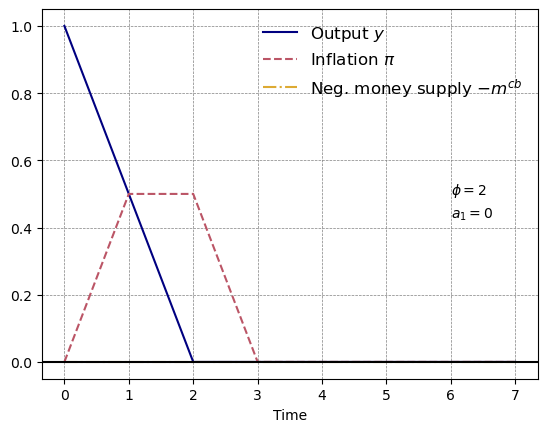

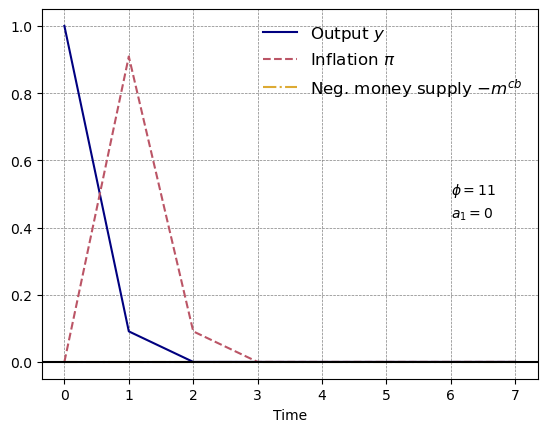

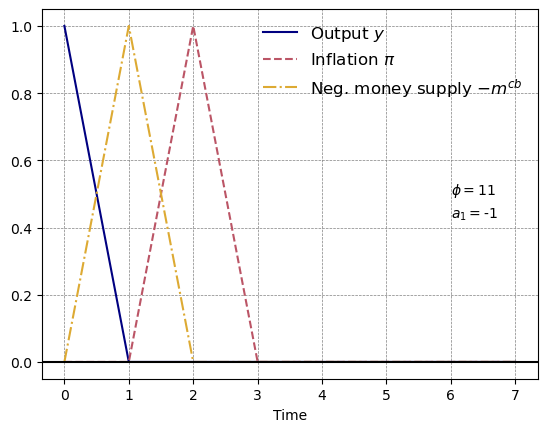

In [68]:
#### Simulate a model with Fischer contracts, firms set price schedule for two periods, CB may stabilize 

import numpy as np
import matplotlib.pyplot as plt

CB =  ['#000000','#004488','#BB5566','#DDAA33', 'purple']
LS = ['solid', 'dashed', ':', '-.']


vecl= 8

## Elasticity of substitution in consumption
θ = 6       ## Monopolistic competition

## Inverse Frisch elasticity
ϕ = 11

## Single shock innovation vector
eps = np.zeros(vecl)
eps[0] = 1

def fischer(θ,ϕ,a1,eps):
    ## Output
    y = np.zeros(eps.size)
    y[0] = eps[0] 
    y[1] = eps[1] + (1+a1)/ϕ * eps[0]
    for t in range(2,eps.size):
        y[t] = eps[t] + (1+a1)/ϕ * eps[t-1]

    pi = np.zeros(vecl)
    pi[1] = (ϕ-1)/ϕ*(1+a1)*eps[0]
    pi[2] = (ϕ-1)/ϕ*(1+a1)*eps[1]-(ϕ-1)/ϕ*(1+a1)*eps[0]+eps[0]    
    for t in range(3,eps.size):
        pi[t] = (ϕ-1)/ϕ*(1+a1)*eps[t-1]-(ϕ-1)/ϕ*(1+a1)*eps[t-2]+eps[t-2]  

    m = np.zeros(vecl)
    m[1] = a1*eps[0]
    for t in range(1,eps.size):
        m[t] = a1*eps[t-1]
        
    return y,pi,m
time = np.linspace(0,vecl-1,vecl)

###############################################################################
#### Plotting
a1=0
ϕ = 2
y_f,pi_f,m_f = fischer(θ,ϕ,a1,eps)
plt.plot(time,y_f, label = r'Output $y$', color = 'navy')
plt.plot(time,pi_f, label = r'Inflation $\pi$', color = CB[2], linestyle = 'dashed')
plt.plot(time,-m_f, label = r'Neg. money supply $-m^{cb}$', color = CB[3], linestyle = '-.')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.annotate(r'$ \phi = $' + str(ϕ),(6,0.5))
plt.annotate(r'$ a_1 = $' + str(a1),(6,0.43))
plt.xlabel('Time')
plt.axhline(0,color = 'black')
plt.legend(frameon= False, fontsize="12")
plt.savefig('Fischer_pers0.pdf')
plt.show()

###############################################################################
#### Plotting
a1=0
ϕ = 11
y_f,pi_f,m_f = fischer(θ,ϕ,a1,eps)
plt.plot(time,y_f, label = r'Output $y$', color = 'navy')
plt.plot(time,pi_f, label = r'Inflation $\pi$', color = CB[2], linestyle = 'dashed')
plt.plot(time,-m_f, label = r'Neg. money supply $-m^{cb}$', color = CB[3], linestyle = '-.')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.annotate(r'$ \phi = $' + str(ϕ),(6,0.5))
plt.annotate(r'$ a_1 = $' + str(a1),(6,0.43))
plt.xlabel('Time')
plt.axhline(0,color = 'black')
plt.legend(frameon= False, fontsize="12")
plt.savefig('Fischer_pers1.pdf')
plt.show()


###############################################################################
#### Plotting
a1=-1
ϕ = 11
y_f,pi_f,m_f = fischer(θ,ϕ,a1,eps)
plt.plot(time,y_f, label = r'Output $y$', color = 'navy')
plt.plot(time,pi_f, label = r'Inflation $\pi$', color = CB[2], linestyle = 'dashed')
plt.plot(time,-m_f, label = r'Neg. money supply $-m^{cb}$', color = CB[3], linestyle = '-.')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.annotate(r'$ \phi = $' + str(ϕ),(6,0.5))
plt.annotate(r'$ a_1 = $' + str(a1),(6,0.43))
plt.xlabel('Time')
plt.axhline(0,color = 'black')
plt.legend(frameon= False, fontsize="12")
plt.savefig('Fischer_pers2.pdf')
plt.show()


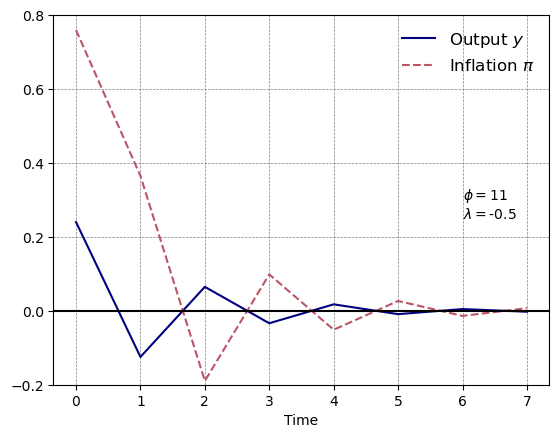

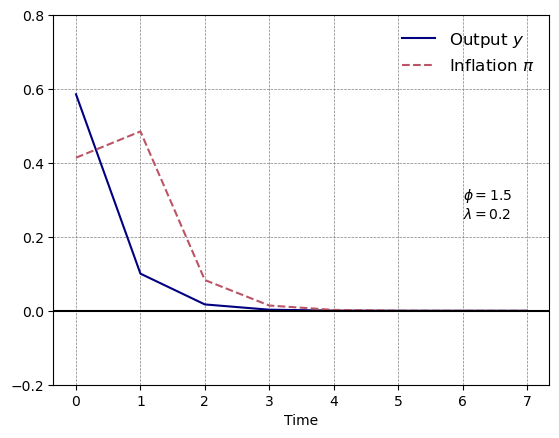

In [74]:

def taylor(θ,ϕ,eps):
    ## Lambda: from process for optimal price setting in Taylor
    λ = (ϕ - 2*np.sqrt(ϕ-1))/(2-ϕ)    
    
    y = np.zeros(eps.size)
    y[0] = (1+λ)/2 * eps[0] 
    for t in range(1,eps.size):
        y[t] = (1+λ)/2 * eps[t] + λ*y[t-1]

    pi = np.zeros(vecl)
    pi[0] = (1-λ)/2 *eps[0]
    for t in range(1,eps.size):
        pi[t] = (1-λ)/2 * eps[t] + (1-λ)*y[t-1]

    return y,pi,λ


###############################################################################
#### Plotting
ϕ = 11
y_t,pi_t,λ_t = taylor(θ,ϕ,eps)
plt.plot(time,y_t, label = r'Output $y$', color = 'navy')
plt.plot(time,pi_t, label = r'Inflation $\pi$', color = CB[2], linestyle = 'dashed')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.annotate(r'$ \phi = $' + str(ϕ),(6,0.3))
plt.annotate(r'$ \lambda = $' + str(np.round(λ_t,1)),(6,0.25))
plt.xlabel('Time')
plt.ylim(-0.2,0.8)
plt.axhline(0,color = 'black')
plt.legend(frameon= False, fontsize="12")
plt.savefig('Taylor_pers0.pdf')
plt.show()


###############################################################################
#### Plotting
ϕ = 1.5
y_t,pi_t,λ_t = taylor(θ,ϕ,eps)
plt.plot(time,y_t, label = r'Output $y$', color = 'navy')
plt.plot(time,pi_t, label = r'Inflation $\pi$', color = CB[2], linestyle = 'dashed')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.annotate(r'$ \phi = $' + str(ϕ),(6,0.3))
plt.annotate(r'$ \lambda = $' + str(np.round(λ_t,1)),(6,0.25))
plt.xlabel('Time')
plt.ylim(-0.2,0.8)
plt.axhline(0,color = 'black')
plt.legend(frameon= False, fontsize="12")
plt.savefig('Taylor_pers1.pdf')
plt.show()